In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
Oxford_temp = pd.read_csv("../../datasets/daily-data-to-april-2022.csv")
Oxford_temp['date'] = (Oxford_temp['YYYY'].astype(str) + '-' + Oxford_temp['MM'].astype(str) + '-' + Oxford_temp['DD'].astype(str)).astype(np.datetime64)
Oxford_dailyMeanTemp = Oxford_temp[['date', 'Daily Tmean °C']].copy()
Oxford_dailyMeanTemp = Oxford_dailyMeanTemp[(Oxford_dailyMeanTemp.date <= '2021-11-8') & (Oxford_dailyMeanTemp.date >= '2019-11-9')]
Oxford_dailyMeanTemp = Oxford_dailyMeanTemp.reset_index()

/var/folders/3z/pg_401fn7_s5mgbb6_147th00000gn/T/ipykernel_17675/3573055247.py:1: DtypeWarning: Columns (6,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  Oxford_temp = pd.read_csv("../../datasets/daily-data-to-april-2022.csv")


In [140]:
v = 0
Oxford_dailyMeanTemp['beta = 6/7'] = np.zeros(len(Oxford_dailyMeanTemp))
Oxford_dailyMeanTemp['beta = 29/30'] = np.zeros(len(Oxford_dailyMeanTemp))
Oxford_dailyMeanTemp['beta = 59/60'] = np.zeros(len(Oxford_dailyMeanTemp))
Oxford_dailyMeanTemp['beta = 6/7, bc'] = np.zeros(len(Oxford_dailyMeanTemp))
Oxford_dailyMeanTemp['beta = 29/30, bc'] = np.zeros(len(Oxford_dailyMeanTemp))
Oxford_dailyMeanTemp['beta = 59/60, bc'] = np.zeros(len(Oxford_dailyMeanTemp))

Oxford_dailyMeanTemp.loc[0,'beta = 6/7'] = 1/7 * Oxford_dailyMeanTemp.loc[0,'Daily Tmean °C']
Oxford_dailyMeanTemp.loc[0,'beta = 29/30'] = 1/30 * Oxford_dailyMeanTemp.loc[0,'Daily Tmean °C']
Oxford_dailyMeanTemp.loc[0,'beta = 59/60'] = 1/60 * Oxford_dailyMeanTemp.loc[0,'Daily Tmean °C']

Oxford_dailyMeanTemp.loc[0,'beta = 6/7, bc'] = 1/(1- 6/7) * Oxford_dailyMeanTemp.loc[0,'beta = 6/7']
Oxford_dailyMeanTemp.loc[0,'beta = 29/30, bc'] = 1/(1- 29/30) * Oxford_dailyMeanTemp.loc[0,'beta = 29/30']
Oxford_dailyMeanTemp.loc[0,'beta = 59/60, bc'] = 1/(1- 59/60) * Oxford_dailyMeanTemp.loc[0,'beta = 59/60']
for t in range(1,len(Oxford_dailyMeanTemp)):
    Oxford_dailyMeanTemp.loc[t,'beta = 6/7'] = 6/7* Oxford_dailyMeanTemp.loc[t-1,'beta = 6/7'] + 1/7 * Oxford_dailyMeanTemp.loc[t,'Daily Tmean °C']
    Oxford_dailyMeanTemp.loc[t,'beta = 29/30'] = 29/30* Oxford_dailyMeanTemp.loc[t-1,'beta = 29/30'] + 1/30 * Oxford_dailyMeanTemp.loc[t,'Daily Tmean °C']
    Oxford_dailyMeanTemp.loc[t,'beta = 59/60'] = 59/60* Oxford_dailyMeanTemp.loc[t-1,'beta = 59/60'] + 1/60 * Oxford_dailyMeanTemp.loc[t,'Daily Tmean °C']
    
    Oxford_dailyMeanTemp.loc[t,'beta = 6/7, bc'] = 1/(1- (6/7)**t) * Oxford_dailyMeanTemp.loc[t,'beta = 6/7']
    Oxford_dailyMeanTemp.loc[t,'beta = 29/30, bc'] = 1/(1- (29/30)**t) * Oxford_dailyMeanTemp.loc[t,'beta = 29/30']
    Oxford_dailyMeanTemp.loc[t,'beta = 59/60, bc'] = 1/(1- (59/60)**t) * Oxford_dailyMeanTemp.loc[t,'beta = 59/60']



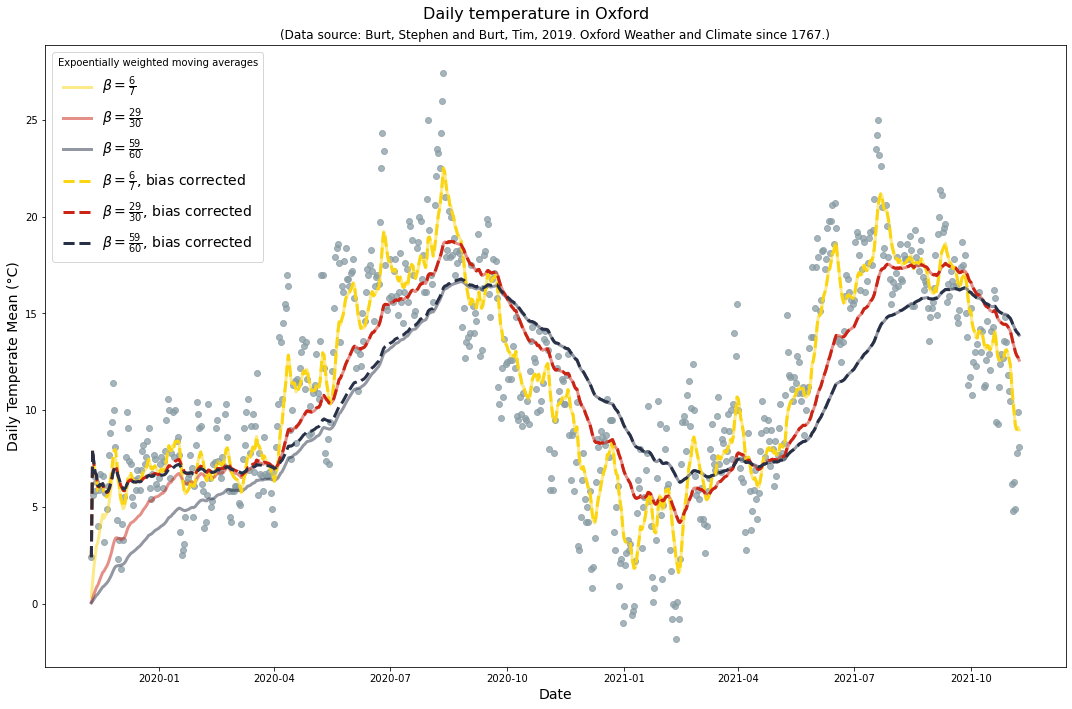

In [158]:
plt.figure(figsize = (15, 10))
plt.scatter(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['Daily Tmean °C'], color = '#899DA4', alpha = 0.75)
plt.plot(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['beta = 6/7'], color = '#FAD510', lw = 3, alpha = 0.5, label = r"$\beta = \frac{6}{7}$")
plt.plot(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['beta = 29/30'], color = '#CB2314', lw = 3, alpha = 0.5, label = r"$\beta = \frac{29}{30}$")
plt.plot(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['beta = 59/60'], color = '#273046', lw = 3, alpha = 0.5, label = r"$\beta = \frac{59}{60}$")

plt.plot(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['beta = 6/7, bc'], color = '#FAD510', lw = 3, linestyle ='dashed', label = r"$\beta = \frac{6}{7}$, bias corrected")
plt.plot(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['beta = 29/30, bc'], color = '#CB2314', lw = 3, linestyle ='dashed', label = r"$\beta = \frac{29}{30}$, bias corrected")
plt.plot(Oxford_dailyMeanTemp.date, Oxford_dailyMeanTemp['beta = 59/60, bc'], color = '#273046', lw = 3, linestyle ='dashed', label = r"$\beta = \frac{59}{60}$, bias corrected")

plt.legend(fontsize = 14, title = "Expoentially weighted moving averages")
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Daily Temperate Mean (°C)', fontsize = 14)
plt.suptitle('Daily temperature in Oxford', fontsize = 16)
plt.title('(Data source: Burt, Stephen and Burt, Tim, 2019. Oxford Weather and Climate since 1767.)', fontsize = 12)
plt.tight_layout()
plt.show()

In [137]:
Oxford_dailyMeanTemp

,index,date,Daily Tmean °C,beta = 6/7,beta = 29/30,beta = 59/60,"beta = 6/7, bc","beta = 29/30, bc","beta = 59/60, bc"
0,74822,2019-11-09,2.4,0.342857,0.080000,2.360000,2.400000,2.400000e+00,1.416000e+02
1,74823,2019-11-10,5.6,1.093878,0.264000,2.414000,20.000000,7.520000e+01,8.360000e+03
2,74824,2019-11-11,6.6,1.880466,0.475200,2.483767,68.169231,1.112237e+03,2.486958e+05
3,74825,2019-11-12,5.8,2.440400,0.652693,2.539037,160.046881,1.112011e+04,4.973449e+06
4,74826,2019-11-13,6.3,2.991771,0.840937,2.601720,300.033828,8.476736e+04,7.521802e+07
...,...,...,...,...,...,...,...,...,...
726,75548,2021-11-04,6.3,9.914886,13.284977,14.303877,9.914886,4.612158e+09,1.175684e+38
727,75549,2021-11-05,4.9,9.198473,13.005478,14.147145,9.198473,4.458420e+09,1.156095e+38
728,75550,2021-11-06,7.8,8.998692,12.831962,14.041360,8.998692,4.309806e+09,1.136832e+38
729,75551,2021-11-07,9.9,9.127450,12.734230,13.972337,9.127450,4.166145e+09,1.117891e+38


/var/folders/3z/pg_401fn7_s5mgbb6_147th00000gn/T/ipykernel_17675/1413308176.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(range(100),1/(1- (29/30)**np.arange(100)))


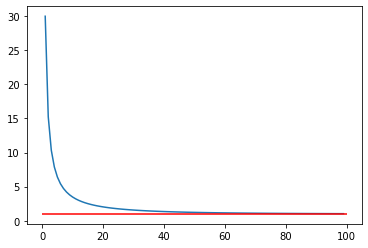

In [135]:
plt.plot(range(100),1/(1- (29/30)**np.arange(100)))
plt.hlines(xmin = 0, xmax = 100, y = 1, color = 'red')